In [1]:
import pandas as pd
import numpy as np

Selecting fewer city for ML Ready 
- CA	California
- TX	Texas
- NY	New York
- PA	Pennsylvania

In [2]:
states = ['CA', 'TX', 'NY', 'PA']
chunks = []

for chunk in pd.read_json(
        './yelp_dataset/yelp_academic_dataset_business.json',
        lines=True,
        chunksize=100000):
    
    filtered = chunk[chunk['state'].isin(states)]
    chunks.append(filtered)

business_df = pd.concat(chunks, ignore_index=True)

business_df.shape
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
2,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
3,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
4,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."


In [3]:
business_df = business_df[[
    'business_id',
    'name',
    'city',
    'state',
    'latitude',
    'longitude',
    'categories',
    'stars',
    'review_count',
]]

In [4]:
cuisine_keywords = ["Indian", "Chinese", "Italian", "Mexican", "Japanese", "Thai",
                    "Korean", "French", "Mediterranean", "American", "Vietnamese",
                    "Greek", "Spanish", "Lebanese", "Turkish", "Brazilian", "Caribbean",
                    "Coffee", "Bakery", "Dessert", "Ice Cream", "Pizza", "Bar", 
                     "Burger", "Sushi", "BBQ", "Pasta",
                    "Sandwiches", "Tea", "Juice", "Seafood", 
                    "Burger", "Sushi", "BBQ", "Pasta","Chicken Wings",
                    "Sandwich", "Tea", "Juice", "Snack", "Seafood", 
                    "Vegan", "Vegetarian","American (Traditional)","American (New)","Thai"]

Again filtering the finanalized keywords from given dataset

In [5]:
allowed_food = {kw.lower() for kw in cuisine_keywords}


def extract_food_categories(categories):
    if pd.isna(categories):
        return []
    
    category_list = [c.strip().lower() for c in categories.split(',')]
    
    return [c.title() for c in category_list if c in allowed_food]



business_df["food_categories"] = business_df["categories"].apply(extract_food_categories)
business_df = business_df[business_df["food_categories"].map(len) > 0]
business_df.shape

(10896, 10)

In [6]:
business_df

,business_id,name,city,state,latitude,longitude,categories,stars,review_count,food_categories
3,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,Philadelphia,PA,39.953949,-75.143226,"Sushi Bars, Restaurants, Japanese",4.0,245,[Japanese]
4,ROeacJQwBeh05Rqg7F6TCg,BAP,Philadelphia,PA,39.943223,-75.162568,"Korean, Restaurants",4.5,205,[Korean]
7,QdN72BWoyFypdGJhhI5r7g,Bar One,Philadelphia,PA,39.939825,-75.157447,"Cocktail Bars, Bars, Italian, Nightlife, Resta...",4.0,65,[Italian]
8,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,Philadelphia,PA,40.022466,-75.218314,"Pizza, Restaurants, Salad, Soup",3.0,41,[Pizza]
10,kV_Q1oqis8Qli8dUoGpTyQ,Ardmore Pizza,Ardmore,PA,40.006707,-75.289671,"Pizza, Restaurants",3.5,109,[Pizza]
...,...,...,...,...,...,...,...,...,...,...
39234,gPr1io7ks0Eo3FDsnDTYfg,Tata Cafe,Philadelphia,PA,40.060414,-75.191084,"Sandwiches, Restaurants, Italian",4.0,21,"[Sandwiches, Italian]"
39236,wVxXRFf10zTTAs11nr4xeA,PrimoHoagies,Philadelphia,PA,40.032483,-75.214430,"Restaurants, Specialty Food, Food, Sandwiches,...",3.0,55,"[Sandwiches, Italian]"
39239,8n93L-ilMAsvwUatarykSg,Kitchen Gia,Philadelphia,PA,39.951018,-75.198240,"Coffee & Tea, Food, Sandwiches, American (Trad...",3.0,22,"[Sandwiches, American (Traditional)]"
39241,l9eLGG9ZKpLJzboZq-9LRQ,Wawa,Clifton Heights,PA,39.925656,-75.310344,"Restaurants, Sandwiches, Convenience Stores, C...",3.0,11,[Sandwiches]


In [7]:
business_df["food_categories"].value_counts(normalize=True).head(10)

food_categories
[Sandwiches]                0.104442
[Pizza]                     0.081957
[American (Traditional)]    0.079203
[American (New)]            0.066722
[Mexican]                   0.064611
[Chinese]                   0.058003
[Italian]                   0.034967
[Japanese]                  0.028726
[Seafood]                   0.023862
[Pizza, Italian]            0.020650
Name: proportion, dtype: float64

In [8]:
business_df["food_categories"] = business_df["food_categories"].apply(
    lambda x: sorted(x) if isinstance(x, list) else x
)

In [9]:
business_df["food_categories"].value_counts(normalize=True).head(10)

food_categories
[Sandwiches]                0.104442
[Pizza]                     0.081957
[American (Traditional)]    0.079203
[American (New)]            0.066722
[Mexican]                   0.064611
[Chinese]                   0.058003
[Italian, Pizza]            0.038913
[Italian]                   0.034967
[Japanese]                  0.028726
[Seafood]                   0.023862
Name: proportion, dtype: float64

mapping categories for ML model

In [10]:
craving_map = {
    "Hot_Hearty_Food": [
        "Indian", "Chinese", "Thai", "Korean", "Mexican",
        "Italian", "BBQ", "Pizza", "Pasta", "Chicken Wings",
        "American (Traditional)", "American (New)","Japanese"
    ],

    "Comfort_Food": [
        "Burger", "Sandwich", "Sandwiches", "Snack",
        "American", "Brazilian", "Caribbean"
    ],

    "Cold_Sweet_Food": [
        "Ice Cream", "Dessert", "Bakery", "Juice"
    ],

    "Light_Healthy_Food": [
        "Vegan", "Vegetarian", "Seafood", "Mediterranean",
        "Greek", "Vietnamese", "Lebanese", "Turkish"
    ],

    "Cafe_Beverages": [
        "Coffee", "Tea"
    ],

    "Alcohol_Social": [
        "Bar"
    ]
}

mapping function 

In [11]:
def map_to_cravings(cuisine_list, craving_map):
    cravings = set()
    for cuisine in cuisine_list:
        for craving, keywords in craving_map.items():
            if cuisine in keywords:
                cravings.add(craving)
    return list(cravings)


In [12]:
business_df["craving_type"] = business_df["food_categories"].apply(
    lambda x: map_to_cravings(x, craving_map)
)

In [13]:
business_df.head()

,business_id,name,city,state,latitude,longitude,categories,stars,review_count,food_categories,craving_type
3,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,Philadelphia,PA,39.953949,-75.143226,"Sushi Bars, Restaurants, Japanese",4.0,245,[Japanese],[Hot_Hearty_Food]
4,ROeacJQwBeh05Rqg7F6TCg,BAP,Philadelphia,PA,39.943223,-75.162568,"Korean, Restaurants",4.5,205,[Korean],[Hot_Hearty_Food]
7,QdN72BWoyFypdGJhhI5r7g,Bar One,Philadelphia,PA,39.939825,-75.157447,"Cocktail Bars, Bars, Italian, Nightlife, Resta...",4.0,65,[Italian],[Hot_Hearty_Food]
8,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,Philadelphia,PA,40.022466,-75.218314,"Pizza, Restaurants, Salad, Soup",3.0,41,[Pizza],[Hot_Hearty_Food]
10,kV_Q1oqis8Qli8dUoGpTyQ,Ardmore Pizza,Ardmore,PA,40.006707,-75.289671,"Pizza, Restaurants",3.5,109,[Pizza],[Hot_Hearty_Food]


Checking null values 

In [14]:
business_df.isnull().sum()

business_id        0
name               0
city               0
state              0
latitude           0
longitude          0
categories         0
stars              0
review_count       0
food_categories    0
craving_type       0
dtype: int64

In [15]:
business_df.shape

(10896, 11)

### Setup + filter businesses (PA & CA)

In [16]:
import pandas as pd
import os
from datetime import datetime
from meteostat import Point, Daily

# Keep only these states (based on what you found)
states = ['PA', 'CA']

# Clean columns
business_df['state'] = business_df['state'].astype(str).str.strip().str.upper()
business_df['city'] = business_df['city'].astype(str).str.strip()

# Filter for locations with coords
biz_locations = (
    business_df[business_df['state'].isin(states)]
    [['business_id', 'city', 'state', 'latitude', 'longitude']]
    .dropna(subset=['latitude', 'longitude', 'city', 'state'])
    .copy()
)

biz_locations['state'].value_counts()

state
PA    10006
CA      890
Name: count, dtype: int64

### Select top K cities per state (controls Meteostat calls)

In [17]:
K = 15  # change to 5 if you want even fewer calls

city_counts = (
    biz_locations
    .groupby(['state', 'city'])
    .size()
    .reset_index(name='business_count')
    .sort_values(['state', 'business_count'], ascending=[True, False])
)

top_cities = city_counts.groupby('state', group_keys=False).head(K)

print("Cities selected per state:")
display(top_cities.groupby('state').size())
top_cities.head()


Cities selected per state:


state
CA     8
PA    15
dtype: int64

,state,city,business_count
5,CA,Santa Barbara,583
1,CA,Goleta,175
0,CA,Carpinteria,60
2,CA,Isla Vista,46
3,CA,Montecito,21


In [20]:
start = datetime(2020, 1, 1)
end   = datetime(2022, 12, 31)

cache_file = f"meteostat_weather_PA_CA_top{K}_cities_2020_2022.csv"

if os.path.exists(cache_file):
    weather_df = pd.read_csv(cache_file, parse_dates=['date'])
    print("Loaded weather from cache:", cache_file)
else:
    weather_data = []

    for _, row in top_cities.iterrows():
        city = row['city']
        state = row['state']

        # Representative point: mean coords of all businesses in that city-state
        coords = biz_locations[
            (biz_locations['city'] == city) &
            (biz_locations['state'] == state)
        ][['latitude', 'longitude']].mean()

        point = Point(coords['latitude'], coords['longitude'])

        w = Daily(point, start, end).fetch().reset_index()

        # Meteostat often returns 'time' column after reset_index()
        if 'time' in w.columns:
            w = w.rename(columns={'time': 'date'})

        w['city'] = city
        w['state'] = state

        weather_data.append(w)

    weather_df = pd.concat(weather_data, ignore_index=True)

    # Keep only columns you will use (add more if needed)
    keep_cols = ['city', 'state', 'date', 'tavg', 'prcp', 'snow', 'wspd', 'pres', 'rhum']
    weather_df = weather_df[[c for c in keep_cols if c in weather_df.columns]]

    weather_df.to_csv(cache_file, index=False)
    print("Saved weather cache:", cache_file)

weather_df.head()

Loaded weather from cache: meteostat_weather_PA_CA_top15_cities_2020_2022.csv


,city,state,date,tavg,prcp,snow,wspd,pres
0,Santa Barbara,CA,2020-01-01,11.3,0.0,0.0,6.5,1015.7
1,Santa Barbara,CA,2020-01-02,14.7,0.0,0.0,7.6,1014.6
2,Santa Barbara,CA,2020-01-03,11.5,0.0,0.0,4.3,1022.6
3,Santa Barbara,CA,2020-01-04,9.9,0.0,0.0,3.6,1026.1
4,Santa Barbara,CA,2020-01-05,11.7,0.0,0.0,9.4,1024.8


In [21]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

weather_df['season'] = weather_df['date'].dt.month.apply(get_season)

# Optional: drop rows missing core weather values
weather_df = weather_df.dropna(subset=['tavg', 'prcp', 'snow'], how='any')

weather_df[['state']].value_counts(), weather_df.head()


(state
 PA       8768
 CA       3098
 Name: count, dtype: int64,
             city state       date  tavg  prcp  snow  wspd    pres  season
 0  Santa Barbara    CA 2020-01-01  11.3   0.0   0.0   6.5  1015.7  Winter
 1  Santa Barbara    CA 2020-01-02  14.7   0.0   0.0   7.6  1014.6  Winter
 2  Santa Barbara    CA 2020-01-03  11.5   0.0   0.0   4.3  1022.6  Winter
 3  Santa Barbara    CA 2020-01-04   9.9   0.0   0.0   3.6  1026.1  Winter
 4  Santa Barbara    CA 2020-01-05  11.7   0.0   0.0   9.4  1024.8  Winter)

In [22]:
print("Weather date range:", weather_df['date'].min(), "to", weather_df['date'].max())
print("States in weather:", weather_df['state'].unique())
print("Unique city-state points:", weather_df[['city','state']].drop_duplicates().shape[0])
weather_df.isna().mean().sort_values(ascending=False).head(10)

Weather date range: 2020-01-01 00:00:00 to 2022-12-31 00:00:00
States in weather: ['CA' 'PA']
Unique city-state points: 16


pres      0.00295
city      0.00000
state     0.00000
tavg      0.00000
date      0.00000
prcp      0.00000
snow      0.00000
wspd      0.00000
season    0.00000
dtype: float64

This is for checking the data 

In [30]:

# review_df = pd.read_json(
#     './yelp_dataset/yelp_academic_dataset_review.json',   
#     lines=True,
#     dtype={
#         'business_id': str,
#         'user_id': str,
#         'date': str,
#         'stars': float,
#         'useful': int,
#         'funny': int,
#         'cool': int,
#     }
# )

# review_df.shape
# review_df.head()

review_df = pd.read_json(
    './yelp_dataset/yelp_academic_dataset_review.json',
    lines=True,
    nrows=100   # change to 100 / 500 / 1000
)

review_df.shape
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


actual code 

In [24]:
biz_key = (
    business_df[business_df['state'].isin(states)]
    [['business_id', 'city', 'state', 'craving_type']]
    .dropna()
)

biz_key.shape

review_file = './yelp_dataset/yelp_academic_dataset_review.json'

chunksize = 100_000   # you can use 50_000 if RAM is low

review_chunks = []

for chunk in pd.read_json(
    review_file,
    lines=True,
    chunksize=chunksize
):
    # Parse date
    chunk['date'] = pd.to_datetime(chunk['date'], errors='coerce')

    # Filter to date range early (BIG memory saver)
    chunk = chunk[
        (chunk['date'] >= '2020-01-01') &
        (chunk['date'] <= '2022-12-31')
    ]

    # Filter to PA & CA businesses early
    chunk = chunk[chunk['business_id'].isin(biz_key['business_id'])]

    # Keep only required columns
    chunk = chunk[['review_id', 'business_id', 'date', 'stars']]

    if not chunk.empty:
        review_chunks.append(chunk)

print("Chunks processed:", len(review_chunks))


Chunks processed: 46


In [25]:
review_df_filtered = pd.concat(review_chunks, ignore_index=True)

review_df_filtered.shape
review_df_filtered.head()

,review_id,business_id,date,stars
0,5-tLhwWjSzHYN6NyMy9Suw,bdfZdB2MTXlT6-RBjSIpQg,2020-01-26 21:21:04,4
1,4M72cXIgMLwXo8METuXZeQ,MbzgGsMQpGyVrUJXi_Jw0Q,2020-01-08 07:25:10,5
2,J1LZjzbs5bFubvS135SD2g,dChRGpit9fM_kZK5pafNyA,2020-01-20 00:36:44,5
3,UH6UMf46vhjiYtslE0ESPQ,iHdrLu8deF5GceB0V1rPhA,2020-02-08 02:18:46,5
4,qrjp2TICzzF06_QlAM39vA,iDtIMWJVIGYspg5JvJKaOw,2020-02-01 02:11:02,1


In [26]:
reviews_enriched = review_df_filtered.merge(
    biz_key,
    on='business_id',
    how='inner'
)

# Convert datetime to date only (for weather join)
reviews_enriched['date'] = reviews_enriched['date'].dt.date

reviews_enriched.shape, reviews_enriched.head()


((148363, 7),
                 review_id             business_id        date  stars  \
 0  5-tLhwWjSzHYN6NyMy9Suw  bdfZdB2MTXlT6-RBjSIpQg  2020-01-26      4   
 1  4M72cXIgMLwXo8METuXZeQ  MbzgGsMQpGyVrUJXi_Jw0Q  2020-01-08      5   
 2  J1LZjzbs5bFubvS135SD2g  dChRGpit9fM_kZK5pafNyA  2020-01-20      5   
 3  UH6UMf46vhjiYtslE0ESPQ  iHdrLu8deF5GceB0V1rPhA  2020-02-08      5   
 4  qrjp2TICzzF06_QlAM39vA  iDtIMWJVIGYspg5JvJKaOw  2020-02-01      1   
 
             city state                           craving_type  
 0     Isla Vista    CA  [Hot_Hearty_Food, Light_Healthy_Food]  
 1  Santa Barbara    CA                      [Hot_Hearty_Food]  
 2   Philadelphia    PA                      [Hot_Hearty_Food]  
 3  Santa Barbara    CA  [Hot_Hearty_Food, Light_Healthy_Food]  
 4      Wynnewood    PA                      [Hot_Hearty_Food]  )

saving intermediate file 

In [35]:
reviews_enriched.to_parquet(
    "reviews_enriched_PA_CA_2020_2022.parquet",
    index=False
)


This is just to see what's there 

In [27]:

review_df_sample = pd.read_json(
    './yelp_dataset/yelp_academic_dataset_checkin.json',
    lines=True,
    nrows=100   # change to 100 / 500 / 1000
)

review_df_sample.shape
review_df_sample.head()


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


In [28]:
states = ['PA', 'CA']

biz_key = (
    business_df[business_df['state'].isin(states)]
    [['business_id', 'city', 'state', 'craving_type']]
    .dropna()
)

biz_ids = set(biz_key['business_id'].unique())
len(biz_ids)


10896

In [29]:

checkin_file = './yelp_dataset/yelp_academic_dataset_checkin.json'
chunksize = 50_000   # adjust (50k/100k) depending on RAM

# We'll accumulate daily counts in a dictionary (business_id, date) -> count
from collections import Counter
daily_counter = Counter()

for chunk in pd.read_json(checkin_file, lines=True, chunksize=chunksize):
    
    # Keep only business_id in PA/CA
    chunk = chunk[chunk['business_id'].isin(biz_ids)]
    if chunk.empty:
        continue
    
    # Split timestamp list and explode
    chunk['date_list'] = chunk['date'].astype(str).str.split(', ')
    exploded = chunk[['business_id', 'date_list']].explode('date_list', ignore_index=True)

    # Parse datetime
    exploded['checkin_dt'] = pd.to_datetime(exploded['date_list'], errors='coerce')

    # Filter 2020-2022 early
    mask = (exploded['checkin_dt'] >= '2020-01-01') & (exploded['checkin_dt'] <= '2022-12-31')
    exploded = exploded[mask]
    if exploded.empty:
        continue

    exploded['date'] = exploded['checkin_dt'].dt.date

    # Count per business per day in this chunk
    grp = exploded.groupby(['business_id', 'date']).size()

    # Add to global counter
    for (bid, d), cnt in grp.items():
        daily_counter[(bid, d)] += int(cnt)

print("Unique (business_id, date) pairs counted:", len(daily_counter))


Unique (business_id, date) pairs counted: 93750


In [30]:
checkins_daily = pd.DataFrame(
    [(bid, d, cnt) for (bid, d), cnt in daily_counter.items()],
    columns=['business_id', 'date', 'checkin_count']
)

In [31]:
print("checkins_daily shape:", checkins_daily.shape)
checkins_daily.head(30)

checkins_daily shape: (93750, 3)


,business_id,date,checkin_count
0,--epgcb7xHGuJ-4PUeSLAw,2020-02-09,1
1,--epgcb7xHGuJ-4PUeSLAw,2020-05-31,1
2,--epgcb7xHGuJ-4PUeSLAw,2020-10-12,1
3,--epgcb7xHGuJ-4PUeSLAw,2020-11-07,1
4,--epgcb7xHGuJ-4PUeSLAw,2021-04-03,1
5,-0FX23yAacC4bbLaGPvyxw,2020-02-01,1
6,-0FX23yAacC4bbLaGPvyxw,2020-02-07,1
7,-0FX23yAacC4bbLaGPvyxw,2020-06-13,1
8,-0FX23yAacC4bbLaGPvyxw,2020-08-07,1
9,-0FX23yAacC4bbLaGPvyxw,2020-08-18,1


In [32]:
checkins_daily.shape

(93750, 3)

- checkins_daily = pd.read_parquet("checkins_daily_PA_CA_2020_2022.parquet")
- To read the below file 

In [44]:
checkins_daily.to_parquet("checkins_daily_PA_CA_2020_2022.parquet", index=False)


In [33]:
# Ensure weather_df date format is compatible
weather_df['date'] = pd.to_datetime(weather_df['date'], errors='coerce').dt.date

checkins_enriched = checkins_daily.merge(
    biz_key,
    on='business_id',
    how='inner'
)

checkin_weather_df = checkins_enriched.merge(
    weather_df,
    on=['city','state','date'],
    how='inner'
)

checkin_weather_df.shape, checkin_weather_df.head()


((55257, 12),
               business_id        date  checkin_count          city state  \
 0  -0TffRSXXIlBYVbb5AwfTg  2020-01-01              1  Philadelphia    PA   
 1  -0TffRSXXIlBYVbb5AwfTg  2020-01-18              1  Philadelphia    PA   
 2  -0TffRSXXIlBYVbb5AwfTg  2020-01-21              1  Philadelphia    PA   
 3  -0TffRSXXIlBYVbb5AwfTg  2020-01-23              1  Philadelphia    PA   
 4  -0TffRSXXIlBYVbb5AwfTg  2020-01-25              1  Philadelphia    PA   
 
         craving_type  tavg  prcp  snow  wspd    pres  season  
 0  [Hot_Hearty_Food]   4.8   0.0   0.0  14.8  1009.9  Winter  
 1  [Hot_Hearty_Food]  -3.8   6.4   0.0  14.8  1028.0  Winter  
 2  [Hot_Hearty_Food]  -3.2   0.0   0.0  15.5  1031.6  Winter  
 3  [Hot_Hearty_Food]   0.6   0.0   0.0   2.2  1029.4  Winter  
 4  [Hot_Hearty_Food]   7.8  40.6   0.0  20.2  1012.5  Winter  )

Build Review-Weather dataset 

In [34]:
# Ensure date formats match
weather_df['date'] = pd.to_datetime(weather_df['date'], errors='coerce').dt.date
review_df_filtered['date'] = pd.to_datetime(review_df_filtered['date'], errors='coerce').dt.date

reviews_enriched = review_df_filtered.merge(
    biz_key[['business_id','city','state','craving_type']],
    on='business_id',
    how='inner'
)

review_weather_df = reviews_enriched.merge(
    weather_df,
    on=['city','state','date'],
    how='inner'
)

review_weather_df.shape, review_weather_df.head()


((83645, 13),
                 review_id             business_id        date  stars  \
 0  5-tLhwWjSzHYN6NyMy9Suw  bdfZdB2MTXlT6-RBjSIpQg  2020-01-26      4   
 1  4M72cXIgMLwXo8METuXZeQ  MbzgGsMQpGyVrUJXi_Jw0Q  2020-01-08      5   
 2  J1LZjzbs5bFubvS135SD2g  dChRGpit9fM_kZK5pafNyA  2020-01-20      5   
 3  UH6UMf46vhjiYtslE0ESPQ  iHdrLu8deF5GceB0V1rPhA  2020-02-08      5   
 4  Z44AVfLHEztjNk-OdFLBxw  -3AooxIkg38UyUdlz5oXdw  2020-03-06      5   
 
             city state                           craving_type  tavg  prcp  \
 0     Isla Vista    CA  [Hot_Hearty_Food, Light_Healthy_Food]  13.5   0.0   
 1  Santa Barbara    CA                      [Hot_Hearty_Food]  12.3   0.0   
 2   Philadelphia    PA                      [Hot_Hearty_Food]  -2.3   0.0   
 3  Santa Barbara    CA  [Hot_Hearty_Food, Light_Healthy_Food]  10.7   0.0   
 4  Santa Barbara    CA                      [Hot_Hearty_Food]  12.8   0.0   
 
    snow  wspd    pres  season  
 0   0.0   6.5  1020.3  Winter  
 1   0.0  

Create ML table from CHECKINS (craving_type × season)

In [48]:
import numpy as np

def list_to_str(x):
    if isinstance(x, list):
        return x[0] if len(x) > 0 else np.nan
    return x

checkin_weather_df['craving_type'] = checkin_weather_df['craving_type'].apply(list_to_str)


In [51]:
business_df['craving_type'] = business_df['craving_type'].apply(list_to_str)
biz_key['craving_type'] = biz_key['craving_type'].apply(list_to_str)


In [52]:
ml_checkins = (
    checkin_weather_df
    .groupby(['craving_type','season'])
    .agg(
        avg_temp=('tavg','mean'),
        avg_prcp=('prcp','mean'),
        avg_snow=('snow','mean'),
        avg_wind=('wspd','mean'),
        avg_pressure=('pres','mean'),
        checkin_volume=('checkin_count','sum'),
        active_days=('date','nunique'),
        unique_businesses=('business_id','nunique')
    )
    .reset_index()
)

ml_checkins.head()


,craving_type,season,avg_temp,avg_prcp,avg_snow,avg_wind,avg_pressure,checkin_volume,active_days,unique_businesses
0,Comfort_Food,Fall,15.912946,2.032639,0.000000,11.464290,1018.213289,2097,182,316
1,Comfort_Food,Spring,12.405437,1.978596,0.000000,14.402753,1017.768992,1589,180,307
2,Comfort_Food,Summer,24.169133,3.960694,0.000000,11.266590,1015.045491,1990,184,302
3,Comfort_Food,Winter,4.819920,2.213679,0.282869,13.478398,1018.813105,2621,199,363
4,Hot_Hearty_Food,Fall,15.840211,1.986661,0.000000,11.306767,1017.794846,11717,182,1739


In [54]:
def list_to_str(x):
    if isinstance(x, list):
        return x[0] if len(x) > 0 else np.nan
    return x

review_weather_df['craving_type'] = review_weather_df['craving_type'].apply(list_to_str)

In [55]:
for df in [business_df, biz_key, checkin_weather_df]:
    if 'craving_type' in df.columns:
        df['craving_type'] = df['craving_type'].apply(list_to_str)


In [56]:
ml_reviews = (
    review_weather_df
    .groupby(['craving_type','season'])
    .agg(
        avg_rating=('stars','mean'),
        review_volume=('review_id','count')
    )
    .reset_index()
)

ml_reviews.head()


,craving_type,season,avg_rating,review_volume
0,Comfort_Food,Fall,3.852219,2321
1,Comfort_Food,Spring,3.921979,1961
2,Comfort_Food,Summer,3.904308,2414
3,Comfort_Food,Winter,3.990406,2710
4,Hot_Hearty_Food,Fall,3.889855,16097


In [ ]:
ml_df = ml_checkins.merge(
    ml_reviews,
    on=['craving_type','season'],
    how='left'
)

# Fill missing review metrics (if a craving-season had checkins but no reviews)
ml_df[['avg_rating','review_volume']] = ml_df[['avg_rating','review_volume']].fillna(0)

ml_df.shape, ml_df.head()

((12, 12),
       craving_type  season   avg_temp  avg_prcp  avg_snow   avg_wind  \
 0     Comfort_Food    Fall  15.912946  2.032639  0.000000  11.464290   
 1     Comfort_Food  Spring  12.405437  1.978596  0.000000  14.402753   
 2     Comfort_Food  Summer  24.169133  3.960694  0.000000  11.266590   
 3     Comfort_Food  Winter   4.819920  2.213679  0.282869  13.478398   
 4  Hot_Hearty_Food    Fall  15.840211  1.986661  0.000000  11.306767   
 
    avg_pressure  checkin_volume  active_days  unique_businesses  avg_rating  \
 0   1018.213289            2097          182                316    3.852219   
 1   1017.768992            1589          180                307    3.921979   
 2   1015.045491            1990          184                302    3.904308   
 3   1018.813105            2621          199                363    3.990406   
 4   1017.794846           11717          182               1739    3.889855   
 
    review_volume  
 0           2321  
 1           1961  
 2     

In [58]:
def add_intensity(group):
    if group['checkin_volume'].nunique() < 3:
        group['checkin_intensity'] = 'Medium'
    else:
        group['checkin_intensity'] = pd.qcut(
            group['checkin_volume'].rank(method='first'),
            q=3,
            labels=['Low','Medium','High']
        )
    return group

ml_df = ml_df.groupby('season', group_keys=False).apply(add_intensity)
ml_df.head()


,craving_type,season,avg_temp,avg_prcp,avg_snow,avg_wind,avg_pressure,checkin_volume,active_days,unique_businesses,avg_rating,review_volume,checkin_intensity
0,Comfort_Food,Fall,15.912946,2.032639,0.000000,11.464290,1018.213289,2097,182,316,3.852219,2321,Medium
1,Comfort_Food,Spring,12.405437,1.978596,0.000000,14.402753,1017.768992,1589,180,307,3.921979,1961,Medium
2,Comfort_Food,Summer,24.169133,3.960694,0.000000,11.266590,1015.045491,1990,184,302,3.904308,2414,Medium
3,Comfort_Food,Winter,4.819920,2.213679,0.282869,13.478398,1018.813105,2621,199,363,3.990406,2710,Medium
4,Hot_Hearty_Food,Fall,15.840211,1.986661,0.000000,11.306767,1017.794846,11717,182,1739,3.889855,16097,High


In [59]:
ml_df.to_csv("ml_ready_table_PA_2020_2022.csv", index=False)
ml_df.to_parquet("ml_ready_table_PA_2020_2022.parquet", index=False)


In [60]:
checkin_weather_df['state'].value_counts()
weather_df['state'].value_counts()


state
PA    8768
CA    3098
Name: count, dtype: int64

In [62]:
ml_df

,craving_type,season,avg_temp,avg_prcp,avg_snow,avg_wind,avg_pressure,checkin_volume,active_days,unique_businesses,avg_rating,review_volume,checkin_intensity
0,Comfort_Food,Fall,15.912946,2.032639,0.000000,11.464290,1018.213289,2097,182,316,3.852219,2321,Medium
1,Comfort_Food,Spring,12.405437,1.978596,0.000000,14.402753,1017.768992,1589,180,307,3.921979,1961,Medium
2,Comfort_Food,Summer,24.169133,3.960694,0.000000,11.266590,1015.045491,1990,184,302,3.904308,2414,Medium
3,Comfort_Food,Winter,4.819920,2.213679,0.282869,13.478398,1018.813105,2621,199,363,3.990406,2710,Medium
4,Hot_Hearty_Food,Fall,15.840211,1.986661,0.000000,11.306767,1017.794846,11717,182,1739,3.889855,16097,High
5,Hot_Hearty_Food,Spring,12.393860,2.521659,0.000000,14.433800,1017.799949,9411,184,1749,3.898551,13179,High
6,Hot_Hearty_Food,Summer,23.870461,3.902481,0.000000,11.296005,1015.162578,10870,184,1730,3.865703,15637,High
7,Hot_Hearty_Food,Winter,5.347411,2.158728,0.230880,13.000780,1018.959007,17117,200,2106,3.900675,19562,High
8,Light_Healthy_Food,Fall,15.912879,1.828375,0.000000,10.886708,1017.514976,1665,181,256,4.087018,2126,Low
9,Light_Healthy_Food,Spring,12.762081,2.498733,0.000000,14.226244,1017.263967,1239,179,249,4.011129,1887,Low


Continue after ML ready dataset 

In [35]:
import pandas as pd
import numpy as np

df = checkin_weather_df.copy()

# Keep only what we need (add/remove weather columns as you have them)
feature_cols_num = ['tavg','tmin','tmax','prcp','snow','wspd','pres']  # adjust if some missing
feature_cols_cat = ['season','city','state']

# Basic cleaning
df = df.dropna(subset=['craving_type'])  # target must exist

# Ensure numeric cols exist (ignore missing ones safely)
feature_cols_num = [c for c in feature_cols_num if c in df.columns]

# Optional: remove rows where all weather is missing
df = df.dropna(subset=feature_cols_num, how='all')

X = df[feature_cols_num + feature_cols_cat].copy()
y = df['craving_type'].astype(str)

print("Rows:", len(df))
print("Classes:", y.nunique())
y.value_counts().head(10)


Rows: 55257
Classes: 8


craving_type
['Hot_Hearty_Food']                                          29871
['Hot_Hearty_Food', 'Light_Healthy_Food']                     6852
['Comfort_Food']                                              6165
['Light_Healthy_Food']                                        4854
['Hot_Hearty_Food', 'Comfort_Food']                           4583
['Hot_Hearty_Food', 'Comfort_Food', 'Light_Healthy_Food']     1104
['Comfort_Food', 'Light_Healthy_Food']                        1100
[]                                                             728
Name: count, dtype: int64

Train/test split (time-based = more realistic)

Use 2020–2021 train, 2022 test (looks professional + avoids leakage).

In [36]:
df['date'] = pd.to_datetime(df['date'])

train_df = df[df['date'] < '2022-01-01'].copy()
test_df  = df[df['date'] >= '2022-01-01'].copy()

X_train = train_df[feature_cols_num + feature_cols_cat]
y_train = train_df['craving_type'].astype(str)

X_test  = test_df[feature_cols_num + feature_cols_cat]
y_test  = test_df['craving_type'].astype(str)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (54388, 8) Test: (869, 8)


Pipeline (OneHot + Impute) + Logistic Regression (baseline)

STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


                                                           precision    recall  f1-score   support

                   ['Comfort_Food', 'Light_Healthy_Food']       0.23      0.23      0.23        30
                                         ['Comfort_Food']       0.11      0.09      0.10        97
['Hot_Hearty_Food', 'Comfort_Food', 'Light_Healthy_Food']       0.00      0.00      0.00        23
                      ['Hot_Hearty_Food', 'Comfort_Food']       0.00      0.00      0.00        66
                ['Hot_Hearty_Food', 'Light_Healthy_Food']       0.00      0.00      0.00       118
                                      ['Hot_Hearty_Food']       0.52      0.36      0.43       455
                                   ['Light_Healthy_Food']       0.00      0.00      0.00        68
                                                       []       0.02      0.58      0.03        12

                                                 accuracy                           0.21       869
        

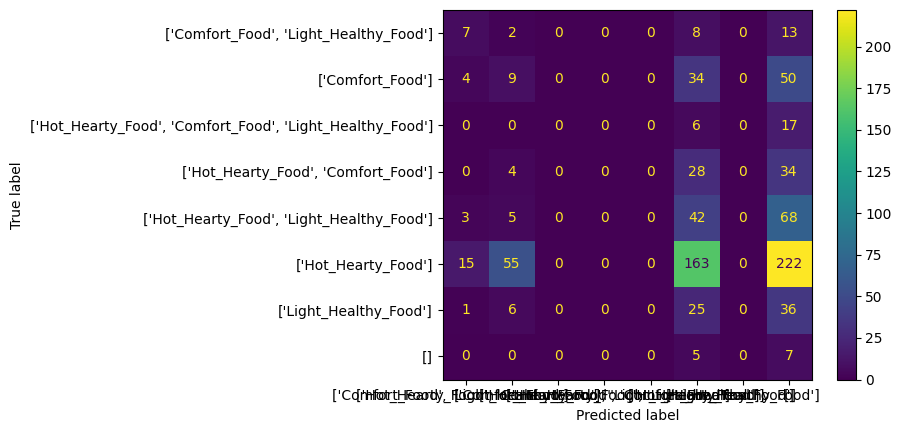

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, feature_cols_num),
        ("cat", categorical_transformer, feature_cols_cat),
    ]
)

logreg = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LogisticRegression(
        max_iter=2000,
        class_weight="balanced",
        multi_class="auto"
    ))
])

logreg.fit(X_train, y_train)
pred_lr = logreg.predict(X_test)

print(classification_report(y_test, pred_lr))
cm = confusion_matrix(y_test, pred_lr, labels=logreg.named_steps["model"].classes_)
ConfusionMatrixDisplay(cm, display_labels=logreg.named_steps["model"].classes_).plot()


                                                           precision    recall  f1-score   support

                   ['Comfort_Food', 'Light_Healthy_Food']       0.20      0.07      0.10        30
                                         ['Comfort_Food']       0.10      0.14      0.12        97
['Hot_Hearty_Food', 'Comfort_Food', 'Light_Healthy_Food']       0.00      0.00      0.00        23
                      ['Hot_Hearty_Food', 'Comfort_Food']       0.09      0.05      0.06        66
                ['Hot_Hearty_Food', 'Light_Healthy_Food']       0.16      0.17      0.17       118
                                      ['Hot_Hearty_Food']       0.56      0.39      0.46       455
                                   ['Light_Healthy_Food']       0.12      0.06      0.08        68
                                                       []       0.02      0.25      0.03        12

                                                 accuracy                           0.26       869
        

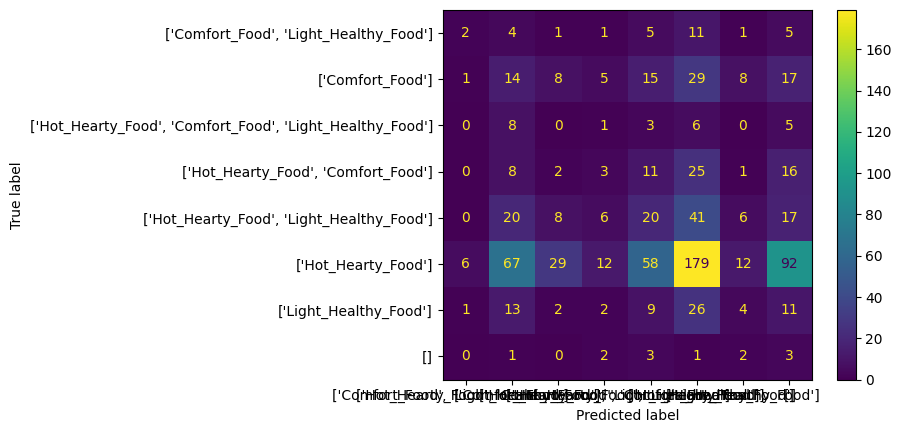

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        class_weight="balanced_subsample",
        n_jobs=-1
    ))
])

rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

print(classification_report(y_test, pred_rf))
cm = confusion_matrix(y_test, pred_rf, labels=rf.named_steps["model"].classes_)
ConfusionMatrixDisplay(cm, display_labels=rf.named_steps["model"].classes_).plot()


A) Feature importance for Random Forest

In [39]:
import pandas as pd

# Get feature names after preprocessing
ohe = rf.named_steps["preprocess"].named_transformers_["cat"].named_steps["onehot"]
cat_features = ohe.get_feature_names_out(feature_cols_cat)

all_features = list(feature_cols_num) + list(cat_features)

importances = rf.named_steps["model"].feature_importances_
fi = pd.DataFrame({"feature": all_features, "importance": importances}).sort_values("importance", ascending=False)

fi.head(20)

,feature,importance
4,pres,0.259647
0,tavg,0.256633
3,wspd,0.234414
1,prcp,0.090248
10,city_Carpinteria,0.023904
13,city_King of Prussia,0.019215
6,season_Spring,0.010978
5,season_Fall,0.010603
9,city_Ardmore,0.009954
8,season_Winter,0.009372
